# Week 2 Assignment

## Assignment for Linear Algebra

**Grad 509: Assignment for linear algebra**

Make sure you can copy, run and understand the code below, obtaining similar results to those presented here.
Once you have successfully run the code, please attempt to answer the questions at the bottom.

In [52]:
import numpy as np
import matplotlib.pyplot as plt

lims = (-5,5)

In [53]:
np.random.seed(1)
data2 = np.random.multivariate_normal([0,0], [[2,1.5],[1.5,2]], 1000)
data2 = data2.T
data2.shape

(2, 1000)

In [54]:
data2

array([[-1.84292873,  1.23518986,  0.00594266, ...,  0.49766004,
        -0.28119532, -1.54980958],
       [-2.45468514,  0.16222124, -2.29559603, ...,  0.68624296,
        -1.20285437, -0.16298398]], shape=(2, 1000))

(-5.0, 5.0)

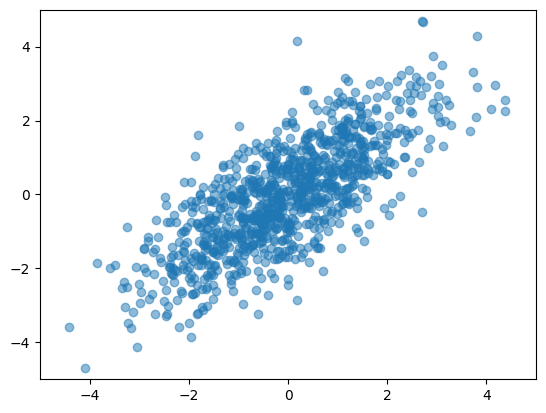

In [55]:
# Create a scatterplot, each point representing 1 of the 1000 2-d Gaussians
plt.scatter(data2[0,:],data2[1,:], alpha=.5)
plt.xlim(lims)
plt.ylim(lims)

In [56]:
# Estimate the covariance matrix
data_cv = np.cov(data2)
data_cv

array([[1.98263953, 1.52927341],
       [1.52927341, 2.08345601]])

In [57]:
U,V = np.linalg.eig(data_cv)
print((U, V))

(array([0.50294381, 3.56315174]), array([[-0.71865998, -0.69536166],
       [ 0.69536166, -0.71865998]]))


In [58]:
data_rot = V @ data2

(-5.0, 5.0)

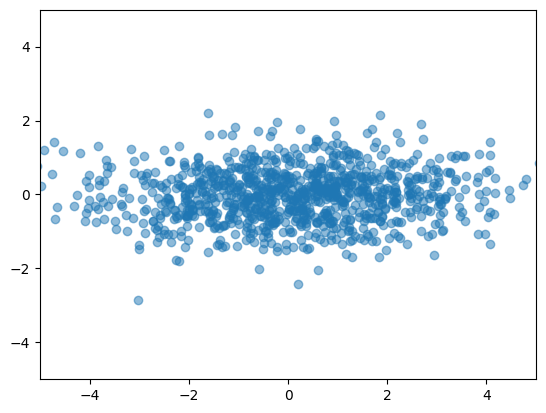

In [59]:
# Plot the rotated data to see that it is indeed rotated to be axis aligned
plt.scatter(data_rot[0,:],data_rot[1,:], alpha=.5)
plt.xlim(lims)
plt.ylim(lims)

In [60]:
data_rot[1,] = 0

(-5.0, 5.0)

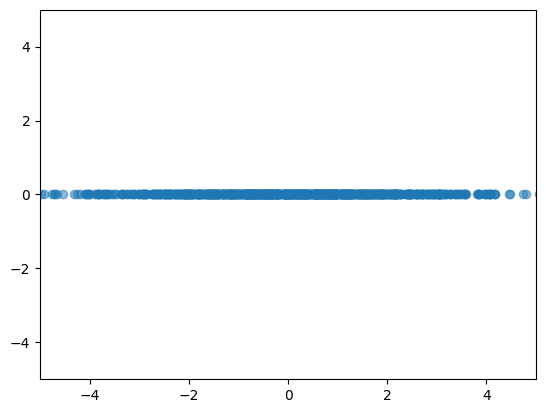

In [61]:
# Visualize the dimensionality-reduced rotated dataset
plt.scatter(data_rot[0,:],data_rot[1,:], alpha=.5)
plt.xlim(lims)
plt.ylim(lims)

In [62]:
data2_1d = V.T @ data_rot

(-5.0, 5.0)

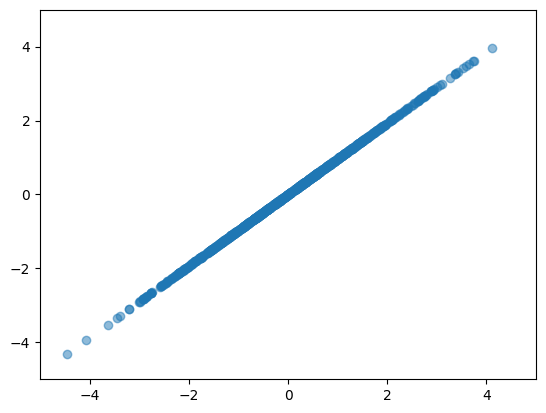

In [63]:
# Plot its scatter plot
plt.scatter(data2_1d[0,:],data2_1d[1,:], alpha=.5)
plt.xlim(lims)
plt.ylim(lims)

### Questions

1. What is the mean and covariance of the 2-dimensional Gaussian used to generate the data? What is estimated covariance matrix?
2. Recall that a rotation matrix is one whose transpose equals its inverse. Verify that the matrix V indeed satisfies this property.
3. Recall the definition of eigenvectors and eigenvalues. Verify that the eigenvalue and eigenvectors returned by the eig() function indeed satisfy this property
4. Observe above the dimensionality reduction involves projecting the 2-d data onto the diagonal. This need not always be the case, and is only because both diagonal elements of the covariance matrix are equal. Play around with some other settings of the covariance matrix and see what happens (keep in mind that it must always be symmetric and positive definite)

### Answers

1. From the code we can infer that the mean vector vector and covariance matrix are:

- $\mu = [0,0] $
- $ \Sigma =     \begin{vmatrix}
    2 & 1.5 \\
    1.5 & 2
    \end{vmatrix}$

And the estimate covariance matrix is $ cov =  \begin{vmatrix}
    1.98263953 & 1.52927341 \\
    1.52927341 & 2.08345601
    \end{vmatrix}$

In [64]:
# 2. We are going to compare both V transpose and V inverse:

print(V.T) #Transpose

print(np.linalg.inv(V)) #Inverse

[[-0.71865998  0.69536166]
 [-0.69536166 -0.71865998]]
[[-0.71865998  0.69536166]
 [-0.69536166 -0.71865998]]


As we see, we confirm that actually both inverse and transpose of V are equal.

3. The properties of eigenvalues and eigenvectors are that:

$$ Au = du $$

Which means that the product of the original matrix with the eigenvector, is equal to the product of the eigenvalue and the eigenvectors

In [65]:
data_cv @ V

array([[-0.36144558, -2.4776791 ],
       [ 0.34972784, -2.56069454]])

In [66]:
V @ U

array([-2.83912469, -2.2109667 ])

In [67]:
V

array([[-0.71865998, -0.69536166],
       [ 0.69536166, -0.71865998]])

In [68]:
for i in range(len(U)):
    eigenvalue = U[i]
    eigenvector = V[:, i]  # Extract the i-th eigenvector (column)

    # Calculate A * v
    Av = np.dot(data_cv, eigenvector)

    # Calculate lambda * v
    lambdav = eigenvalue * eigenvector

    if np.allclose(Av, lambdav):
        print(f"\nValidation successful for eigenpair {i+1}:")
        print(f"A * v = {Av}")
        print(f"lambda * v = {lambdav}")
    else:
        print(f"\nValidation failed for eigenpair {i+1}:")
        print(f"A * v = {Av}")
        print(f"lambda * v = {lambdav}")


Validation successful for eigenpair 1:
A * v = [-0.36144558  0.34972784]
lambda * v = [-0.36144558  0.34972784]

Validation successful for eigenpair 2:
A * v = [-2.4776791  -2.56069454]
lambda * v = [-2.4776791  -2.56069454]


4. Observe above the dimensionality reduction involves projecting the 2-d data onto the diagonal. This need not always be the case, and is only because both diagonal elements of the covariance matrix are equal. Play around with some other settings of the covariance matrix and see what happens (keep in mind that it must always be symmetric and positive definite)


First to be able to "play around" we need to find a way to construct valide covariance matrices, to do this, the matrices must follow this rules:

*For a matrix A = $ \Sigma = \begin{vmatrix} a & b \\ b & c \end{vmatrix}$, $a > 0 $ and $ ac - b^{2}>0$*

In [69]:
# From this we can create multiple covariance matrices:

cov_0 = np.array([[2,1.5],[1.5,2]])

cov_1 = np.array([[3,0.5],[0.5,2]])

cov_2 = np.array([[1,0.8],[0.8,3]])

cov_3 = np.array([[5,-1],[-1,1]])

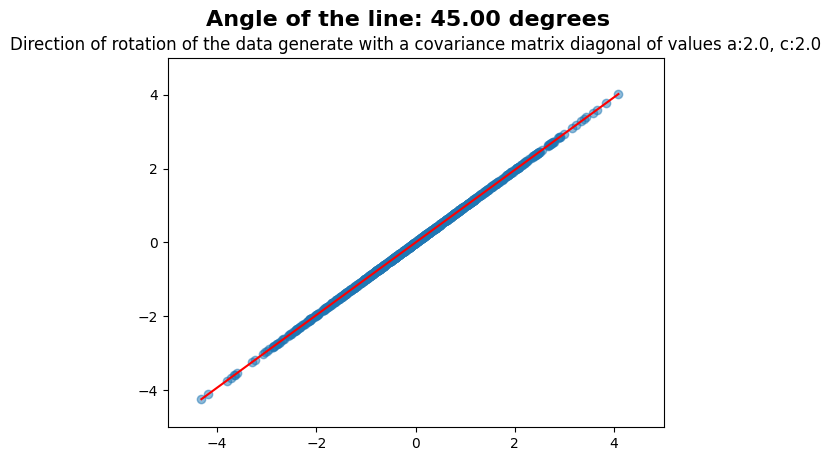

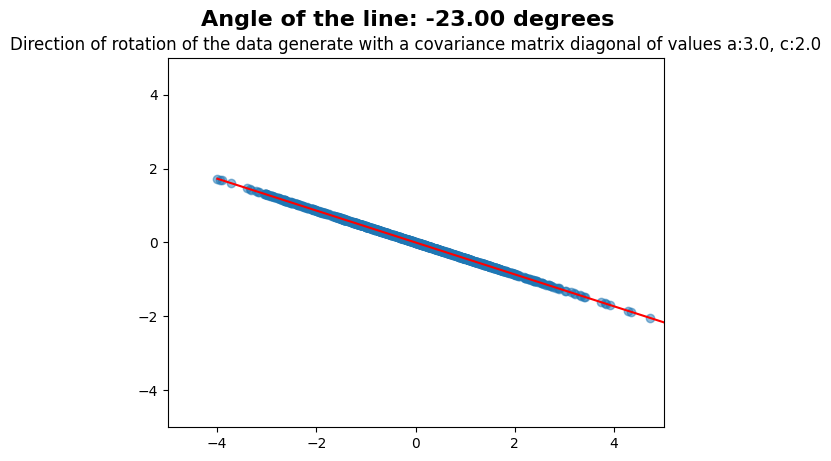

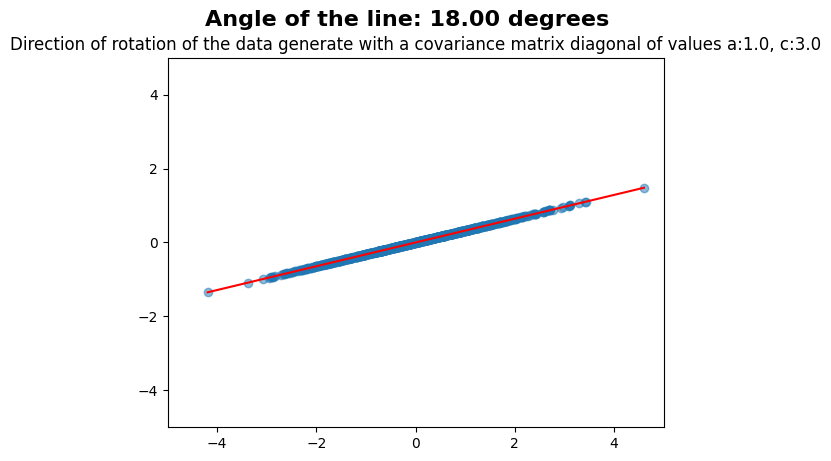

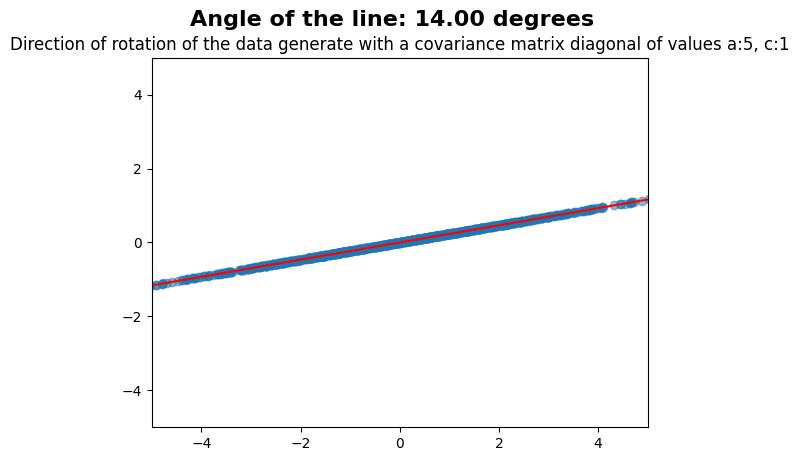

In [70]:
from scipy.stats import linregress

cov = [cov_0, cov_1, cov_2, cov_3]

for i in range(len(cov)):
    data2 = np.random.multivariate_normal([0,0], cov[i], 1000)
    data2 = data2.T

    data_cv = np.cov(data2)
    U,V = np.linalg.eig(data_cv)
    data_rot = V @ data2

    data_rot[1,] = 0

    data2_1d = V.T @ data_rot
    slope, intercept, r_value, p_value, std_err = linregress(data2_1d[0,:], data2_1d[1,:])

    plt.figure()
    plt.scatter(data2_1d[0,:],data2_1d[1,:], alpha=.5)
    plt.xlim(lims)
    plt.ylim(lims)

    line_x = np.array([data2_1d[0,:].min(), data2_1d[0,:].max()])
    line_y = slope * line_x + intercept
    plt.plot(line_x, line_y, color='red', label=f'Regression Line (y = {slope:.2f}x + {intercept:.2f})')
    
    angle_radians = np.arctan(slope)
    angle_degrees = np.ceil(np.degrees(angle_radians))

    plt.title(f"Direction of rotation of the data generate with a covariance matrix diagonal of values a:{cov[i][0,0]}, c:{cov[i][1,1]}")
    plt.suptitle(f"Angle of the line: {angle_degrees:.2f} degrees", fontsize=16, fontweight='bold')

plt.show()


We see that the data does not project on the 45°, principal direction tilts toward the variable with larger variance.